In [605]:
import numpy as np
import time

### **Data test**

In [606]:
def generate_test():
    f = open('8nodes(5)', 'w')
    f.write('9\n')
    f.write('0 0\n')

    for i in range(8):
        x = np.random.randint(-10, 10)
        y = np.random.randint(-10, 10)
        f.write('{} {}\n'.format(x, y))

    f.close()

# generate_test()

In [607]:
def load_data(path = "8nodes(5)"):
    with open(path, 'r') as f:
        inputData = f.readlines()
    
    N = int(inputData[0].strip())
    node_list=[]
    for node in inputData[1:]:
        #del '\n' 
        node = node.strip()
        #split by ' '
        node = node.split(' ')
        node_list.append((int(node[0]), int(node[1])))

    return node_list, N


In [608]:

node_list, num_nodes = load_data()

In [609]:
def DistanceMatrix(cities, n):
    dis_matrix = np.zeros([n,n])
    min_dis = np.full((n, 2), np.inf)
    adv0 = []
    for i in range(n):
        for j in range(i+1, n):
            a = np.array(cities[i])
            b = np.array(cities[j])
            c = a - b
            dis_matrix[i, j] = np.sqrt(np.sum(c*c))
            if dis_matrix[i, j] < min_dis[i, 1]:
              min_dis[i, 0] = j
              min_dis[i, 1] = dis_matrix[i, j]
            dis_matrix[j, i] = dis_matrix[i, j]
            if dis_matrix[j, i] < min_dis[j, 1] and i != 0:
              min_dis[j, 0] = i
              min_dis[j, 1] = dis_matrix[i, j]
            if i == 0: adv0.append((dis_matrix[i, j], j))
    
    adv0.sort(key=lambda tup: tup[0], reverse = False)

    return np.around(dis_matrix, 2), np.around(min_dis, 2), adv0

dis_matrix, min_dis, adv0 = DistanceMatrix(node_list, num_nodes)

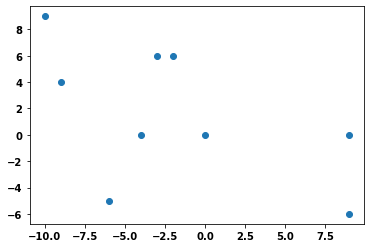

In [610]:
import matplotlib.pyplot as plt

points = np.array(node_list)

plt.scatter(points[:, 0], points[:, 1])

### **Algorithm**

In [611]:
from copy import deepcopy

#Backtracking

K=2
cmin = 1e9
for i in dis_matrix.flatten():
    if i != 0.0:
        cmin = min(cmin, i)

mark = [0 for i in range(100)]
path = [0 for i in range(100)]
res_path = []

def dominate(p1, p2):
    if (p1[0] < p2[0] and p1[1] <= p2[1]) or (p1[0] <= p2[0] and p1[1] < p2[1]):
        return True
    return False  

def TRY(k, list_city, res, curr_dis):
    global res_path
    n = len(list_city)
    if n == 0:
        return 0, []

    for i in list_city:
        if mark[i] == 0:
            mark[i] = 1
            curr_dis = curr_dis + dis_matrix[path[k-1]][i]
            path[k] = i

            if curr_dis + cmin*(n-k) > res:
                mark[i] = 0
                curr_dis = curr_dis - dis_matrix[path[k-1]][i]
                continue

            if k == n:
                curr_res = curr_dis + dis_matrix[i][0]
                if res > curr_res:
                    res = np.around(curr_res, 2)
                    path[n+1] = 0
                    res_path = path[:n+2]
            else:
                res,_ = TRY(k+1, list_city, res, curr_dis)

            mark[i] = 0
            curr_dis = curr_dis - dis_matrix[path[k-1]][i]

    return res, res_path


K=2
div_list = [[] for i in range(K+1)]
res_list = [[np.inf, np.inf, []]]

def TRY_div(t):
    for i in range(1, K+1):
        div_list[i].append(t)

        if(t == num_nodes-1):
            
            max_dis = 0
            total_dis = 0
            path_list = [()]
            for k in range(1, K+1):
                res, path_k = TRY(1, div_list[k], 1e9, 0)
                max_dis = max(max_dis, res)
                total_dis += res
                path_list.append((deepcopy(div_list[k]), path_k))

            insert = 0
            id = 0
            max_dis = np.around(max_dis, 2)
            total_dis = np.around(total_dis, 2)
            while(id < len(res_list)):
                if res_list[id][0] == max_dis and res_list[id][1] == total_dis:
                    insert = 0
                    break
                
                if dominate(res_list[id], [max_dis, total_dis]):
                    insert = 0
                    break

                if dominate([max_dis, total_dis], res_list[id]):
                    insert = 1
                    res_list.pop(id)
                    continue

                insert = 1
                id += 1

            if insert == 1:
                # print('pre: ', end='')
                # print(res_list)
                res_list.append([max_dis, total_dis, path_list])
                # res_list.sort(key=lambda tup: tup[0])
                # print(res_list)
            
        else:
            TRY_div(t+1)
        
        div_list[i].pop()
            

s = time.time()
TRY_div(1)
e = time.time()
print(res_list)
print(e-s)

[[61.86, 61.86, [(), ([1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 4, 6, 2, 5, 3, 8, 7, 0]), ([], [])]], [38.92, 64.74, [(), ([1, 2, 3, 4, 5, 6], [0, 1, 4, 6, 2, 3, 5, 0]), ([7, 8], [0, 7, 8, 0])]], [37.34, 70.66, [(), ([1, 2, 3, 4, 6], [0, 1, 4, 6, 2, 3, 0]), ([5, 7, 8], [0, 5, 8, 7, 0])]], [37.84, 68.28, [(), ([1, 2, 4, 5, 6], [0, 1, 4, 6, 2, 5, 0]), ([3, 7, 8], [0, 3, 8, 7, 0])]], [37.22, 74.28, [(), ([1, 4, 7, 8], [0, 4, 1, 7, 8, 0]), ([2, 3, 5, 6], [0, 3, 2, 6, 5, 0])]]]
0.5212936401367188


In [612]:
res_list.sort(key=lambda tup: tup[0])
for sol in res_list:
    print(sol[0], sol[1])

37.22 74.28
37.34 70.66
37.84 68.28
38.92 64.74
61.86 61.86


In [613]:
# K=2
# cmin = 1e9
# for i in dis_matrix.flatten():
#     if i != 0.0:
#         cmin = min(cmin, i)

# while(True):
#     generate_test()
#     node_list, num_nodes = load_data()
#     dis_matrix, min_dis, adv0 = DistanceMatrix(node_list, num_nodes)

#     mark = [0 for i in range(100)]
#     path = [0 for i in range(100)]
#     res_path = []

#     div_list = [[] for i in range(K+1)]
#     res_list = [[np.inf, np.inf, []]]

#     TRY_div(1)

#     # if res_list[0][0] != res_list[0][1] and len(res_list) < 3:
#     #     break
#     if len(res_list) == 5:
#         break

# print(res_list) 
# res_list.sort(key=lambda tup: tup[0])
# data = np.array(res_list, dtype=object)

# plt.plot(data[:, 0], data[:, 1])
# plt.show()

In [614]:
#Branch and bound

cmin = 1e9
for i in dis_matrix.flatten():
    if i != 0.0:
        cmin = min(cmin, i)

mark = [0 for i in range(100)]
res = 1e9
curr_dis = 0
path = [0 for i in range(100)]

def TRY(k):
    global curr_dis
    global res
    
    for i in range(1, num_nodes):
        if mark[i] == 0:
            mark[i] = 1
            curr_dis = curr_dis + dis_matrix[path[k-1]][i]
            path[k] = i

            if curr_dis + cmin*(num_nodes-k) > res:
                mark[i] = 0
                curr_dis = curr_dis - dis_matrix[path[k-1]][i]
                continue

            if k + 1 == num_nodes:
                res = min(res, curr_dis+dis_matrix[i][0])
            else:
                TRY(k+1)

            mark[i] = 0
            curr_dis = curr_dis - dis_matrix[path[k-1]][i]
            
s = time.time()
TRY(1)
e = time.time()
print(res)
print(e-s)

61.85999999999436
0.06781816482543945


### **Show result**

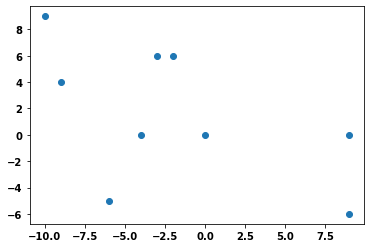

In [615]:
plt.scatter(points[:, 0], points[:, 1])

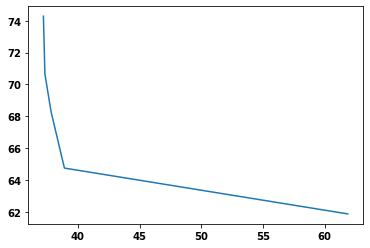

In [616]:
res_list.sort(key=lambda tup: tup[0])
data = np.array(res_list, dtype=object)

plt.plot(data[:, 0], data[:, 1])
plt.show()

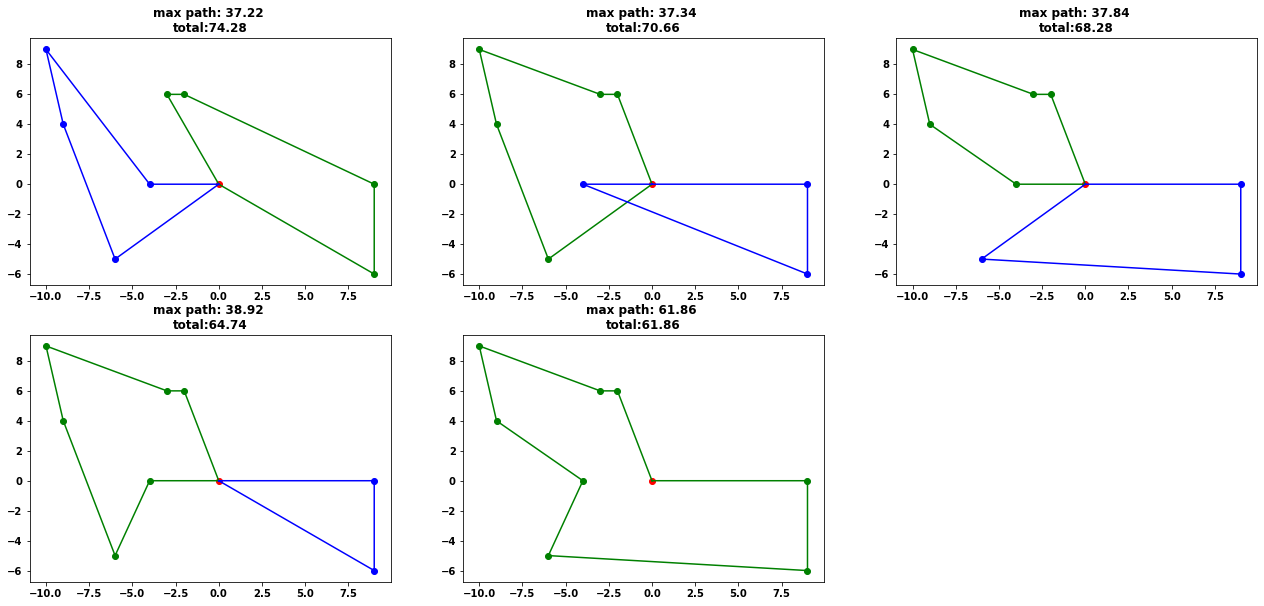

In [617]:
def show(data):
    rows = int(np.ceil(len(data)/3))
    plt.figure(figsize=(22, 5*rows))
    for i in range(len(data)):
        plt.subplot(rows, 3, i+1)
        plt.scatter([0], [0], c='r')

        plt.scatter(points[data[i][2][1][0], 0], points[data[i][2][1][0], 1], c='g')
        plt.scatter(points[data[i][2][2][0], 0], points[data[i][2][2][0], 1], c='b')

        plt.plot(points[data[i][2][1][1], 0], points[data[i][2][1][1], 1], c='g')
        plt.plot(points[data[i][2][2][1], 0], points[data[i][2][2][1], 1], c='b')
        plt.title('max path: {} \ntotal:{}'.format(data[i][0], data[i][1]))

    plt.show()

show(data)